In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from math import pi
from scipy import signal
from savitzky_golay import savitzky_golay

# Читаем спектр образца из файла

In [2]:
#read data from file
pathway='/Users/dariasatco/Documents/study/research_project/experiment/25012018/CNT_1_8_0_8V.Sample.csv'

dataOCP=pd.read_csv(pathway, names=('wavelength','absorbance'),sep=';')
dataOCP.drop(dataOCP.index[:2], inplace=True)
dataOCP.info() #control output
dataOCP=dataOCP.astype(float) #convert object to float type
dataOCP.dtypes
number_len=len((dataOCP.index))+2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 2 to 777
Data columns (total 2 columns):
wavelength    776 non-null object
absorbance    776 non-null object
dtypes: object(2)
memory usage: 18.2+ KB


# Убираем ступеньки из спектра

In [3]:
n1=375+1
n2=610+1
for k in range(2,number_len):
    if k > n2:
        dataOCP.loc[k,'step free']=dataOCP.loc[k,'absorbance']
    elif n1 < k <= n2:
        dataOCP.loc[k,'step free']=dataOCP.loc[k,'absorbance']+dataOCP.loc[n2+1,'absorbance']-\
        dataOCP.loc[n2,'absorbance']
    else:
        dataOCP.loc[k,'step free']=dataOCP.loc[k,'absorbance']+dataOCP.loc[n2+1,'absorbance']-\
        dataOCP.loc[n2,'absorbance']+dataOCP.loc[n1+1,'absorbance']-dataOCP.loc[n1,'absorbance']
dataOCP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 2 to 777
Data columns (total 3 columns):
wavelength    776 non-null float64
absorbance    776 non-null float64
step free     776 non-null float64
dtypes: float64(3)
memory usage: 44.2 KB


In [4]:
h=4.135667e-15 #Planck constant
cv=299792458 #speed of light
nano=1e-9 #nano scaling
for k in range(2,number_len):
    dataOCP.loc[k,'energy']=h*cv/(dataOCP.loc[k,'wavelength']*nano)
dataOCP.info()
dataOCP

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 2 to 777
Data columns (total 4 columns):
wavelength    776 non-null float64
absorbance    776 non-null float64
step free     776 non-null float64
energy        776 non-null float64
dtypes: float64(4)
memory usage: 50.3 KB


,wavelength,absorbance,step free,energy
2,3300.0,0.8109,0.8435,0.375710
3,3296.0,0.8764,0.9090,0.376166
4,3292.0,0.8441,0.8767,0.376623
5,3288.0,0.7827,0.8153,0.377081
6,3284.0,0.8990,0.9316,0.377540
7,3280.0,0.8207,0.8533,0.378001
8,3276.0,0.7132,0.7458,0.378462
9,3272.0,0.7275,0.7601,0.378925
10,3268.0,0.7091,0.7417,0.379389
11,3264.0,0.7184,0.7510,0.379853


# Спектр до вычета ионной жидкости

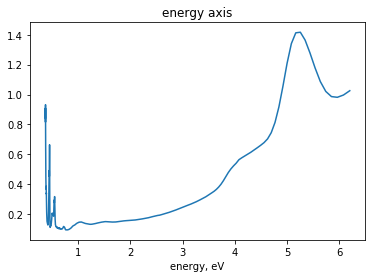

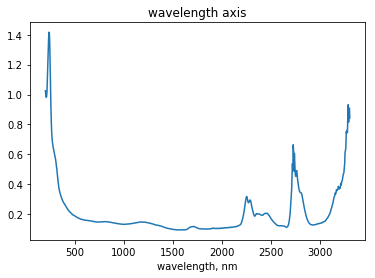

In [5]:
plt.plot(dataOCP['energy'],dataOCP['step free'])
plt.title('energy axis')
plt.xlabel('energy, eV')
plt.show()
plt.plot(dataOCP['wavelength'],dataOCP['step free'])
plt.title('wavelength axis')
plt.xlabel('wavelength, nm')
plt.show()

# Читаем данные ионной жидкости

In [6]:
pathway='/Users/dariasatco/Documents/study/research_project/experiment/26012018/deme_bf4_1.Sample.csv'
dataIL=pd.read_csv(pathway, names=('wavelength','absorbance'),sep=';')
dataIL.drop(dataIL.index[:2], inplace=True)
dataIL.info() #control output
dataIL=dataIL.astype(float) #convert object to float type
dataIL.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 2 to 777
Data columns (total 2 columns):
wavelength    776 non-null object
absorbance    776 non-null object
dtypes: object(2)
memory usage: 18.2+ KB


wavelength    float64
absorbance    float64
dtype: object

In [7]:
for k in range(2,number_len):
    if k > n2:
        dataIL.loc[k,'step free']=dataIL.loc[k,'absorbance']
    elif n1 < k <= n2:
        dataIL.loc[k,'step free']=dataIL.loc[k,'absorbance']+dataIL.loc[n2+1,'absorbance']-\
        dataIL.loc[n2,'absorbance']
    else:
        dataIL.loc[k,'step free']=dataIL.loc[k,'absorbance']+dataIL.loc[n2+1,'absorbance']-\
        dataIL.loc[n2,'absorbance']+dataIL.loc[n1+1,'absorbance']-dataIL.loc[n1,'absorbance']
dataIL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 2 to 777
Data columns (total 3 columns):
wavelength    776 non-null float64
absorbance    776 non-null float64
step free     776 non-null float64
dtypes: float64(3)
memory usage: 44.2 KB


In [8]:
for k in range(2,number_len):
    dataIL.loc[k,'energy']=h*cv/(dataIL.loc[k,'wavelength']*nano)
dataIL.info()
dataIL

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 2 to 777
Data columns (total 4 columns):
wavelength    776 non-null float64
absorbance    776 non-null float64
step free     776 non-null float64
energy        776 non-null float64
dtypes: float64(4)
memory usage: 50.3 KB


,wavelength,absorbance,step free,energy
2,3300.0,0.7982,0.8019,0.375710
3,3296.0,0.7668,0.7705,0.376166
4,3292.0,0.9858,0.9895,0.376623
5,3288.0,0.8872,0.8909,0.377081
6,3284.0,0.8517,0.8554,0.377540
7,3280.0,0.7023,0.7060,0.378001
8,3276.0,0.7248,0.7285,0.378462
9,3272.0,0.7442,0.7479,0.378925
10,3268.0,0.6976,0.7013,0.379389
11,3264.0,0.6493,0.6530,0.379853


# Спектр ионной жидкости 

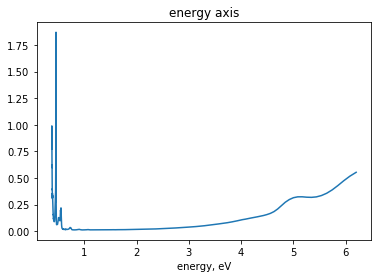

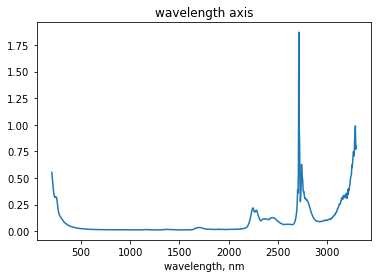

In [9]:
plt.plot(dataIL['energy'],dataIL['step free'])
plt.title('energy axis')
plt.xlabel('energy, eV')
plt.show()
plt.plot(dataIL['wavelength'],dataIL['step free'])
plt.title('wavelength axis')
plt.xlabel('wavelength, nm')
plt.show()

# Вычитаем ионную жидкость из спектра образца

In [10]:
for k in range(2,number_len):
    dataOCP.loc[k,'data-IL']=dataOCP.loc[k,'step free']-dataIL.loc[k,'step free']
dataOCP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 2 to 777
Data columns (total 5 columns):
wavelength    776 non-null float64
absorbance    776 non-null float64
step free     776 non-null float64
energy        776 non-null float64
data-IL       776 non-null float64
dtypes: float64(5)
memory usage: 56.4 KB


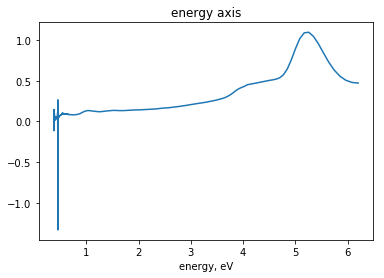

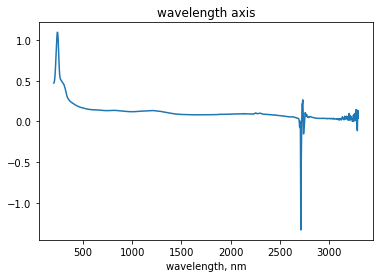

In [11]:
plt.plot(dataOCP['energy'],dataOCP['data-IL'])
plt.title('energy axis')
plt.xlabel('energy, eV')
plt.show()
plt.plot(dataOCP['wavelength'],dataOCP['data-IL'])
plt.title('wavelength axis')
plt.xlabel('wavelength, nm')
plt.show()

# Ищем background

Lorentz-Fano parameters:
center = 5.35692172924
gammaL = 0.530860476522
numL = 1.8276168473
resonance = 4.41645594467
gammaF = 0.558782995959
q = -5.73921343058
numF = 0.00717060943012
Lorentz parameters
[ 5.3456528   0.73032472  2.33930997]
Fano parameters
[ 5.4137442   1.15106526 -10.          0.01063557]


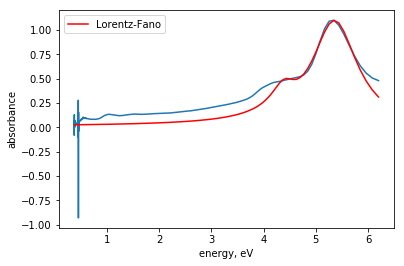

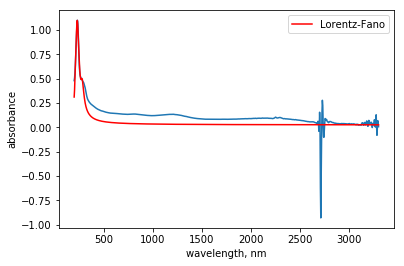

In [27]:
# Lorentz-Fano model
def LorentzFano(x, center,gammaL,numL, resonance,gammaF,q,numF):
    return numL/(pi*gammaL*(1.0+((x-center)/gammaL)**2)) + \
    (2*(x-resonance)/gammaF + q)**2/((2*(x-resonance)/gammaF)**2 + 1.0)*numF
    
# Lorentz model
def Lorentz(x, center,gammaL,numL):
    return numL/(pi*gammaL*(1.0+((x-center)/gammaL)**2))

#Fano model
def Fano(x, resonance,gammaF,q,numF):
    return numF*(2*(x-resonance)/gammaF + q)**2/((2*(x-resonance)/gammaF)**2 + 1.0)

minparam=(4,0.1,0, 3,0.1,-10,0.005) #lower bound for approximation parameters
maxparam=(6,4,10, 6,4,0,1)         #upper bound for approximation parameters

x=np.array(dataOCP['energy'])        
y=np.array(dataOCP['data-IL'])

#look for noisy tail
for i in range(1,number_len-2):
    if (y[number_len-2-i] < 0.0):
        noise_num=number_len-2-i+10
#        print(noise_num)
        break
    
b, a = signal.butter(3, 0.5)
y=signal.lfilter(b, a, y)
#y[1:noise_num] = signal.lfilter(b, a, y[1:noise_num])
#y[1:noise_num] = savitzky_golay(y[1:noise_num],71, 5) #smooth noise in the UV range
#dataOCP['data-IL']=y

#look for better peaces of data for Fano-Lorentz approximation
i=1
controln=[]
numbers=[]
for k in range(int(0.75*number_len),number_len,5):
    
    x1=np.concatenate((x[k:number_len], x[1:noise_num]))
    y1=np.concatenate((y[k:number_len], y[1:noise_num]))

    LFopt, LFcov = curve_fit(LorentzFano, x1, y1, bounds=(minparam,maxparam), method='trf')
    Lopt, Lcov = curve_fit(Lorentz, x1, y1, bounds=(minparam[0:3],maxparam[0:3]), method='trf')
    Fopt, Fcov = curve_fit(Fano, x1, y1, bounds=(minparam[3:7],maxparam[3:7]), method='trf')
    
    controln.append(np.sum(np.sqrt(np.diag(LFcov))))
    numbers.append(k)

#check when the fitting was the best
ind = controln.index(min(controln))

#make approximation for best fitting

x1=np.concatenate((x[numbers[ind]:number_len-5], x[1:noise_num]))
y1=np.concatenate((y[numbers[ind]:number_len-5], y[1:noise_num]))

LFopt, LFcov = curve_fit(LorentzFano, x1, y1, bounds=(minparam,maxparam), method='trf')
Lopt, Lcov = curve_fit(Lorentz, x1, y1, bounds=(minparam[0:3],maxparam[0:3]), method='trf')
Fopt, Fcov = curve_fit(Fano, x1, y1, bounds=(minparam[3:7],maxparam[3:7]), method='trf')

print('Lorentz-Fano parameters:')
print('center =', LFopt[0])
print('gammaL =', LFopt[1])
print('numL =', LFopt[2])
print('resonance =', LFopt[3])
print('gammaF =', LFopt[4])
print('q =', LFopt[5])
print('numF =', LFopt[6])

print('Lorentz parameters')
print(Lopt)

print('Fano parameters')
print(Fopt)

plt.plot(x,y)

LF=plt.plot(x, LorentzFano(x, *LFopt), color='red', label='Lorentz-Fano')

#L=plt.plot(x, Lorentz(x, *Lopt), label='Lorentz')

#F=plt.plot(x, Fano(x, *Fopt), color='green', label='Fano')

plt.xlabel('energy, eV')
plt.ylabel('absorbance')
plt.legend()

plt.show()

u=np.array(dataOCP['wavelength'])

plt.plot(u,y)

LF=plt.plot(u, LorentzFano(x, *LFopt), color='red', label='Lorentz-Fano')

#L=plt.plot(x, Lorentz(x, *Lopt), label='Lorentz')

#F=plt.plot(x, Fano(x, *Fopt), color='green', label='Fano')

plt.xlabel('wavelength, nm')
plt.ylabel('absorbance')
plt.legend()

plt.show()

# Записываем данные в таблицу

In [28]:
dataOCP['Lorentz-Fano']=LorentzFano(x, *LFopt)
dataOCP['Lorentz']=Lorentz(x, *Lopt)
dataOCP['Fano']=Fano(x, *Fopt)

#calculate data - approximation
dataOCP['data-LF']=dataOCP['data-IL']-dataOCP['Lorentz-Fano']
dataOCP['data-L']=dataOCP['data-IL']-dataOCP['Lorentz']
dataOCP['data-F']=dataOCP['data-IL']-dataOCP['Fano']
dataOCP

,wavelength,absorbance,step free,energy,data-IL,Lorentz-Fano,Lorentz,Fano,data-LF,data-L,data-F
2,3300.0,0.8109,0.8435,0.375710,0.0416,0.026231,0.021551,0.048186,0.015369,0.020049,-0.006586
3,3296.0,0.8764,0.9090,0.376166,0.1385,0.026234,0.021555,0.048191,0.112266,0.116945,0.090309
4,3292.0,0.8441,0.8767,0.376623,-0.1128,0.026237,0.021559,0.048195,-0.139037,-0.134359,-0.160995
5,3288.0,0.7827,0.8153,0.377081,-0.0756,0.026240,0.021563,0.048200,-0.101840,-0.097163,-0.123800
6,3284.0,0.8990,0.9316,0.377540,0.0762,0.026243,0.021567,0.048204,0.049957,0.054633,0.027996
7,3280.0,0.8207,0.8533,0.378001,0.1473,0.026247,0.021571,0.048209,0.121053,0.125729,0.099091
8,3276.0,0.7132,0.7458,0.378462,0.0173,0.026250,0.021575,0.048213,-0.008950,-0.004275,-0.030913
9,3272.0,0.7275,0.7601,0.378925,0.0122,0.026253,0.021579,0.048218,-0.014053,-0.009379,-0.036018
10,3268.0,0.7091,0.7417,0.379389,0.0404,0.026256,0.021583,0.048223,0.014144,0.018817,-0.007823
11,3264.0,0.7184,0.7510,0.379853,0.0980,0.026259,0.021586,0.048227,0.071741,0.076414,0.049773


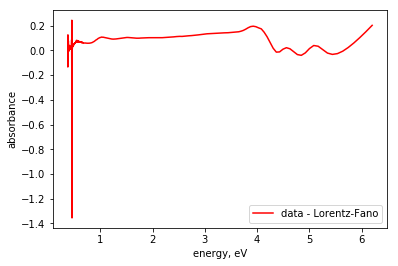

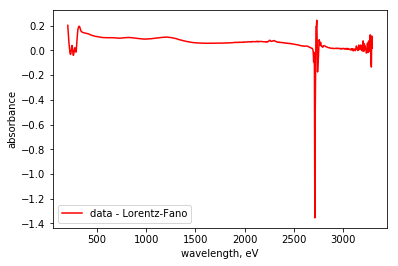

In [14]:
DLF=plt.plot(x, dataOCP['data-LF'], color='red', label='data - Lorentz-Fano')
#DL=plt.plot(x, dataOCP['data-L'], label='Lorentz', color='blue')
#DF=plt.plot(x, dataOCP['data-F'], label='Fano', color='green')
plt.xlabel('energy, eV')
plt.ylabel('absorbance')
plt.legend()

plt.show()

DLF=plt.plot(u, dataOCP['data-LF'], color='red', label='data - Lorentz-Fano')
#DL=plt.plot(x, dataOCP['data-L'], label='Lorentz', color='blue')
#DF=plt.plot(x, dataOCP['data-F'], label='Fano', color='green')
plt.xlabel('wavelength, eV')
plt.ylabel('absorbance')
plt.legend()

plt.show()

In [15]:
filename='25012018_ap/-2_processed.csv'
dataOCP.to_csv(filename, sep=';')

In [16]:
file_parameters=open('25012018_ap/parameters_-2V.txt', 'w+')
for k in range(0,len(LFopt)):
    file_parameters.write(str(LFopt[k])+'  ')
file_parameters.close()